# importe de modelo

In [19]:
from tensorflow.keras.applications import MobileNetV2

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image as image_ops

In [21]:
img_width,img_height=224,224

model=MobileNetV2(weights='imagenet',
                include_top=False,
                input_shape=(img_height,img_width,3)
                )

In [22]:
for (i,layer) in enumerate(model.layers):
    print(f"{i} {layer.__class__.__name__} {layer.trainable}")

0 InputLayer True
1 Conv2D True
2 BatchNormalization True
3 ReLU True
4 DepthwiseConv2D True
5 BatchNormalization True
6 ReLU True
7 Conv2D True
8 BatchNormalization True
9 Conv2D True
10 BatchNormalization True
11 ReLU True
12 ZeroPadding2D True
13 DepthwiseConv2D True
14 BatchNormalization True
15 ReLU True
16 Conv2D True
17 BatchNormalization True
18 Conv2D True
19 BatchNormalization True
20 ReLU True
21 DepthwiseConv2D True
22 BatchNormalization True
23 ReLU True
24 Conv2D True
25 BatchNormalization True
26 Add True
27 Conv2D True
28 BatchNormalization True
29 ReLU True
30 ZeroPadding2D True
31 DepthwiseConv2D True
32 BatchNormalization True
33 ReLU True
34 Conv2D True
35 BatchNormalization True
36 Conv2D True
37 BatchNormalization True
38 ReLU True
39 DepthwiseConv2D True
40 BatchNormalization True
41 ReLU True
42 Conv2D True
43 BatchNormalization True
44 Add True
45 Conv2D True
46 BatchNormalization True
47 ReLU True
48 DepthwiseConv2D True
49 BatchNormalization True
50 ReLU True

In [23]:
for layer in model.layers:
    layer.trainable=False

In [24]:
for (i,layer) in enumerate(model.layers):
    print(f"{i} {layer.__class__.__name__} {layer.trainable}")

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 ReLU False
4 DepthwiseConv2D False
5 BatchNormalization False
6 ReLU False
7 Conv2D False
8 BatchNormalization False
9 Conv2D False
10 BatchNormalization False
11 ReLU False
12 ZeroPadding2D False
13 DepthwiseConv2D False
14 BatchNormalization False
15 ReLU False
16 Conv2D False
17 BatchNormalization False
18 Conv2D False
19 BatchNormalization False
20 ReLU False
21 DepthwiseConv2D False
22 BatchNormalization False
23 ReLU False
24 Conv2D False
25 BatchNormalization False
26 Add False
27 Conv2D False
28 BatchNormalization False
29 ReLU False
30 ZeroPadding2D False
31 DepthwiseConv2D False
32 BatchNormalization False
33 ReLU False
34 Conv2D False
35 BatchNormalization False
36 Conv2D False
37 BatchNormalization False
38 ReLU False
39 DepthwiseConv2D False
40 BatchNormalization False
41 ReLU False
42 Conv2D False
43 BatchNormalization False
44 Add False
45 Conv2D False
46 BatchNormalization False
47 ReLU False
48 DepthwiseCon

In [25]:
def add_layer_at_bottom(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

# Aqui se cargan los datos

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_data_dir='chestData/train'
val_data_dir='chestData/test'

In [28]:
#from tensorflow.keras.preprocessing.image_ops import HORIZONTAL
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=45,
                                 width_shift_range=0.3,
                                 height_shift_range=0.3,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

val_datagen=ImageDataGenerator(rescale=1./255)

In [29]:
batch_size=32

In [30]:
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

val_generator=val_datagen.flow_from_directory(val_data_dir,
                                              target_size=(img_height,img_width),
                                              batch_size=batch_size,
                                              class_mode='categorical')


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [31]:
train_class_names = set()
num_train_samples=0
for i in train_generator.filenames:
    train_class_names.add(i.split('/')[0])
    num_train_samples+=1
print(num_train_samples)
train_class_names

251


{'Covid\\01.jpeg',
 'Covid\\010.png',
 'Covid\\012.jpeg',
 'Covid\\015.jpg',
 'Covid\\019.png',
 'Covid\\02.jpeg',
 'Covid\\020.jpg',
 'Covid\\021.jpeg',
 'Covid\\022.jpeg',
 'Covid\\024.jpeg',
 'Covid\\025.jpeg',
 'Covid\\026.jpeg',
 'Covid\\027.jpeg',
 'Covid\\03.jpeg',
 'Covid\\031.jpeg',
 'Covid\\032.jpeg',
 'Covid\\033.png',
 'Covid\\039.jpeg',
 'Covid\\04.png',
 'Covid\\040.jpeg',
 'Covid\\041.jpeg',
 'Covid\\042.jpeg',
 'Covid\\043.jpeg',
 'Covid\\044.jpeg',
 'Covid\\045.jpeg',
 'Covid\\046.jpeg',
 'Covid\\047.jpeg',
 'Covid\\048.jpeg',
 'Covid\\049.jpeg',
 'Covid\\050.jpeg',
 'Covid\\051.jpeg',
 'Covid\\052.jpeg',
 'Covid\\053.jpeg',
 'Covid\\054.jpeg',
 'Covid\\055.jpeg',
 'Covid\\056.jpg',
 'Covid\\057.jpeg',
 'Covid\\058.jpeg',
 'Covid\\059.jpeg',
 'Covid\\06.jpeg',
 'Covid\\060.jpeg',
 'Covid\\061.jpg',
 'Covid\\062.jpeg',
 'Covid\\064.jpg',
 'Covid\\065.jpeg',
 'Covid\\067.jpg',
 'Covid\\068.jpg',
 'Covid\\069.jpg',
 'Covid\\07.jpg',
 'Covid\\071.jpg',
 'Covid\\072.jpeg',


In [32]:
val_class_names = set()
num_val_samples=0
for i in val_generator.filenames:
    val_class_names.add(i.split('/')[0])
    num_val_samples+=1
print(num_val_samples)
val_class_names

66


{'Covid\\0100.jpeg',
 'Covid\\0102.jpeg',
 'Covid\\0105.png',
 'Covid\\0106.jpeg',
 'Covid\\0108.jpeg',
 'Covid\\0111.jpg',
 'Covid\\0112.jpg',
 'Covid\\0113.jpg',
 'Covid\\0115.jpeg',
 'Covid\\0118.jpeg',
 'Covid\\0119.jpeg',
 'Covid\\0120.jpg',
 'Covid\\094.png',
 'Covid\\096.png',
 'Covid\\098.jpeg',
 'Covid\\COVID-00003b.jpg',
 'Covid\\COVID-00012.jpg',
 'Covid\\COVID-00022.jpg',
 'Covid\\COVID-00033.jpg',
 'Covid\\COVID-00037.jpg',
 'Covid\\auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg',
 'Covid\\auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Covid\\auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Covid\\auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Covid\\auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Covid\\radiopaedia-2019-novel-coronavirus-infected-pneumonia.jpg',
 'Normal\\0101.jpeg',
 'Normal\\0102.jpeg',
 'Normal\\0103.jpeg',
 'Normal\\0105.j

In [33]:
num_classes=len(train_generator.class_indices)
print(num_classes)
FC_head=add_layer_at_bottom(model,
                            num_classes)

main_model=Model(inputs=model.input,
                 outputs=FC_head)

main_model.summary()

3
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']    

# Training

In [34]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [35]:

checkpoint = ModelCheckpoint("enfermedad_dec.h5",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=2,
                          verbose=1,
                          restore_best_weights=True)

callbacks=[checkpoint,earlystop]

main_model.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=0.0015),
                   metrics=['accuracy'])

epochs=10

batch_size = 32

history = main_model.fit(train_generator,
                         steps_per_epoch=num_train_samples//batch_size,
                         epochs=epochs,
                         callbacks=callbacks,
                         validation_data=val_generator,
                         validation_steps=num_val_samples//batch_size)



Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 7.8405 - accuracy: 0.3881
Epoch 1: val_loss improved from inf to 0.94483, saving model to enfermedad_dec.h5
7/7 [==============================] - 8s 969ms/step - loss: 7.8405 - accuracy: 0.3881 - val_loss: 0.9448 - val_accuracy: 0.4688
Epoch 2/10
7/7 [==============================] - ETA: 0s - loss: 1.2113 - accuracy: 0.4932
Epoch 2: val_loss did not improve from 0.94483
7/7 [==============================] - 5s 763ms/step - loss: 1.2113 - accuracy: 0.4932 - val_loss: 0.9467 - val_accuracy: 0.5938
Epoch 3/10
7/7 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.6986
Epoch 3: val_loss improved from 0.94483 to 0.70123, saving model to enfermedad_dec.h5
7/7 [==============================] - 6s 848ms/step - loss: 0.6858 - accuracy: 0.6986 - val_loss: 0.7012 - val_accuracy: 0.7031
Epoch 4/10
7/7 [==============================] - ETA: 0s - loss: 1.0004 - accuracy: 0.6621
Epoch 4: val_loss did not impr

## viendo


1/1 [==============================] - 0s 382ms/step
[[9.9954212e-01 1.5789365e-04 2.9998086e-04]]


'Covid'

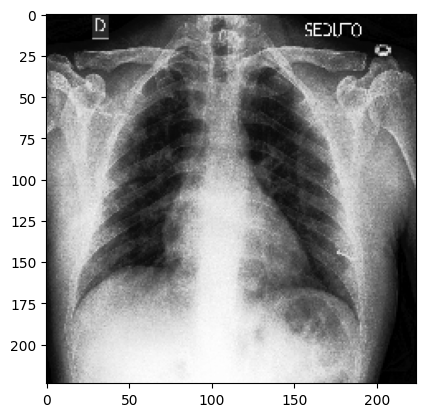

In [40]:
import cv2
out=['Covid', 'Normal', 'Viral Pneumonia']
img=cv2.imread("D:/Practicas_Python/inv/chestData/train/Covid/01.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
img=img/255.
import matplotlib.pyplot as plt
plt.imshow(img)
img=img.reshape(1,224,224,3)
import numpy as np
res=main_model.predict(img)
print(res)
out[np.argmax(res)]